In [1]:
# import necessary libarries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# reading csv file
colnames=['Key', 'Values']
df = pd.read_csv("clusters.csv", sep='\t', names=colnames, header=None)

In [3]:
# split column 
df[['Temperature', 'Humidity']] = df['Values'].str.split(',', expand=True)

In [4]:
df

,Key,Values,Temperature,Humidity
0,Bahrain,"28.47822456035752,56.8790016995957",28.47822456035752,56.8790016995957
1,Bejaja,"18.370800951361215,74.93411843377955",18.370800951361215,74.93411843377955
2,Belize City,"27.73913453305437,80.75510504677312",27.73913453305437,80.75510504677312
3,Bridgetown,"27.46045870269677,75.48324334626777",27.46045870269677,75.48324334626777
4,Buckland,"-1.844138435836813,80.02186726705526",-1.844138435836813,80.02186726705526
5,Cabinda,"27.003120026476964,80.34161294408962",27.003120026476964,80.34161294408962
6,Charles Town,"27.88231410975081,69.8047120438679",27.88231410975081,69.8047120438679
7,Chittagong,"27.70839026080758,73.14130339631062",27.70839026080758,73.14130339631062
8,Corning,"16.21537358491923,79.68149593536981",16.21537358491923,79.68149593536981
9,Edson,"1.5713530369103939,77.23143062991907",1.5713530369103939,77.23143062991907


In [5]:
df.dtypes

Key            object
Values         object
Temperature    object
Humidity       object
dtype: object

In [6]:
df['Temperature'] = df['Temperature'].astype(float, errors = 'raise')

In [7]:
df['Humidity'] = df['Humidity'].astype(float, errors = 'raise')

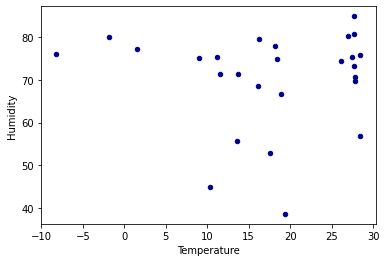

In [8]:
ax1 = df.plot.scatter(x='Temperature', y='Humidity', c='DarkBlue')

[[27.53177057 76.1451471 ]
 [17.89044703 49.77555117]
 [14.7942751  73.45459751]
 [-2.83720976 77.77086197]]


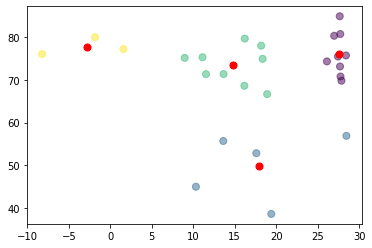

In [9]:
kmeans = KMeans(n_clusters=4).fit(df[['Temperature','Humidity']])
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Temperature'], df['Humidity'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

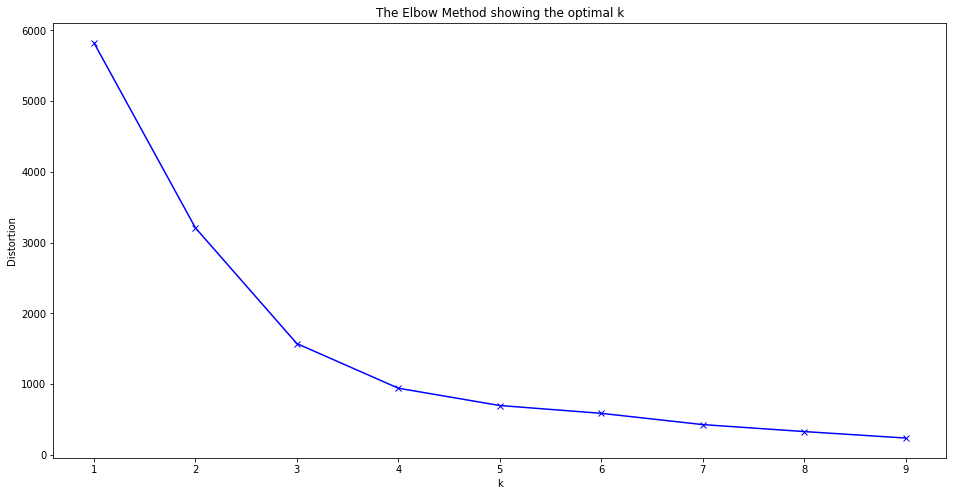

In [10]:
# using elbow method to find the optimal K

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[['Temperature','Humidity']])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

<IPython.core.display.Javascript object>


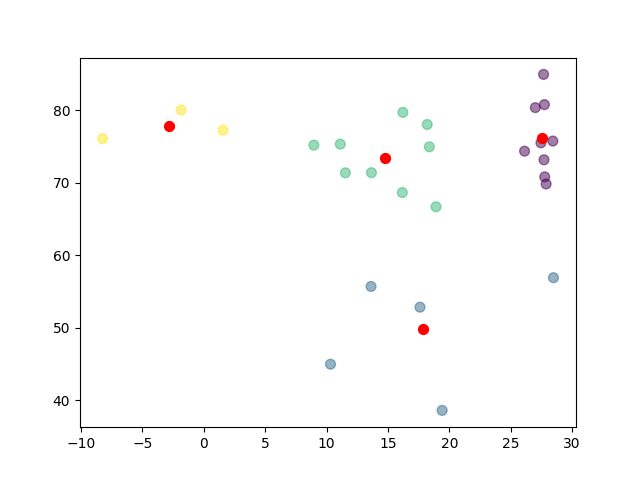

In [13]:
# pip install ipympl necessary to run matplotlib widget
# pip install mplcursors required to run mplcursors

import mplcursors
%matplotlib notebook
%matplotlib widget

fig, ax = plt.subplots()
sc = ax.scatter(df['Temperature'],df['Humidity'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

cursor = mplcursors.cursor(sc, hover=True)

@cursor.connect("add")

def on_add(sel):
    sel.annotation.set(text=(df['Key'].values)[sel.target.index])
    
plt.show()